# Image Filters and Kernels

## Convolutional Neural Networks (CNN)

Convolutional Neural Networks are a specific architecture of Neural Networks that are extremely effective at dealing with image data. 

## Image Filters

- Computer vision is a general term of using computer programs to process image data.
- In photo editing programs, there are ***filters***, such as a ***blur filter***. 
- In the below photo, Gaussian Blur Filter has been implemented.

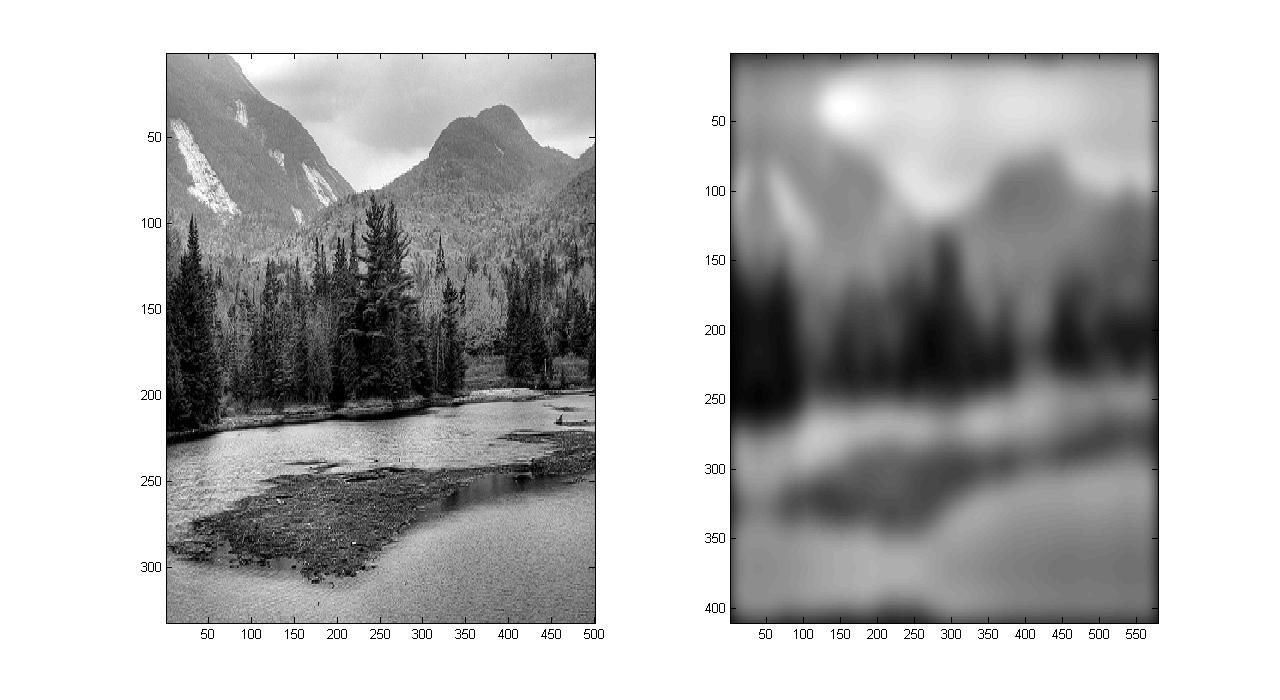

- Filters are essentially an ***image kernel***, which is a small matrix applied to an entire image. 
- Certain popular filters are well known, for example, that's a Gaussian blur filter: 

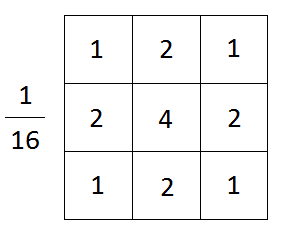

##### Image Properties

Every image has three properties; <br>
- **Size:** This is the height and width of the image. It can be represented in centimeters, inches or even in pixels.
- **Color Space:** A color space is a specific organization of colors. Examples are **RGB**, **HSV** and **HSL**.
- **Channel:** This is an attribute of the color space. For example, RGB colorspace has three types of colors or attributes known as **R**ed, **G**reen and **B**lue (RGB).

##### Grayscale Images

- Grayscale images are single-channeled images in which each pixel carries only information about the intensity of light. These images are exclusively made up of shades of gray.

- Grayscale images should not be confused with black and white images (binary images) which contain only black and white pixels. In binary images, either a pixel is black or it is white. They have no colours in between. But Greyscale images have a wide range of shades of grey in their pixels.

##### RGB Images

- Unlike grayscale images, RGB images are three channeled. Each pixel is made up of three channels, with each channel representing a colour. 

- It is important to distinguish between RGB images and grayscale images. An RGB image has three color channels: Red channel, Green channel and Blue channel. However, a grayscale image has just one channel.

##### Pixel Values

- The colors of an image are denoted by its pixel values. A pixel can have only one color but can be merged to create multiple colors.<br>
- In a grayscale image where there is only one channel, a pixel value has just a single number ranging from (0, 255) — both inclusive. 
> Pixel value `[0]` ==========> **BLACK**<br>
> Pixel value `[255]` ==========> **WHITE**<br>
> For example, since the value `[40]` is close to 0 rather than 255 (white), the color of the pixel is also close to black. 

- In an RGB image where there are three color channels, a pixel value has three numbers, each ranging from 0 to 255 (both inclusive). For example, the number 0 of a pixel in the red channel means that there is no red color in the pixel while the number 255 means that there is 100% red color in the pixel. This interpretation is also valid for pixels in the other two channels. A pixel value in an RGB image can be represented as follows:
> `[255, 255, 0]` ==========> This pixel value represents yellow.

## Grayscale Image Representation

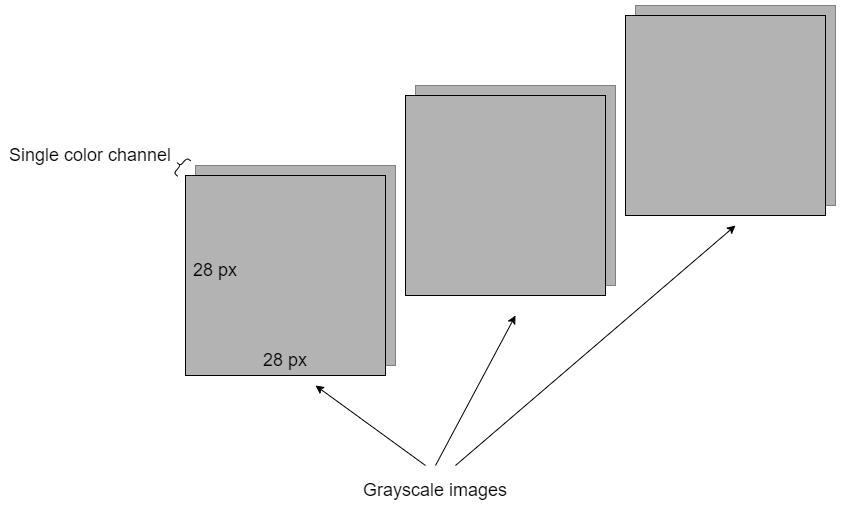

The shape of the above batch of 3 grayscale images can be represented as:

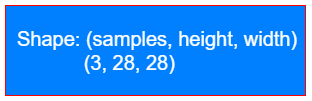

## RGB Image Representation

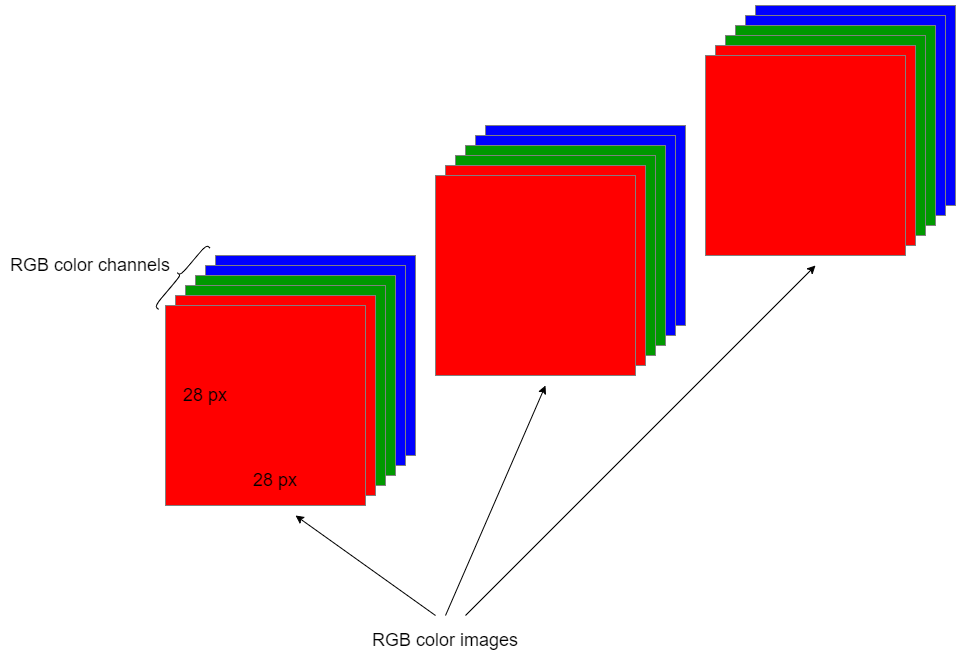


The shape of the above batch of 3 RGB images can be represented in two different ways:<br>
- **Channels - Last:**  This places the color channel axis at the end. This is a standard in TensorFlow (Keras) and OpenCV.
- **Channels - First:** This places the color channel axis after the samples axis.

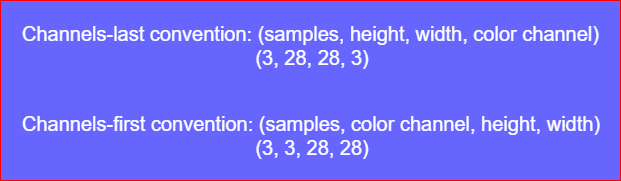

- Filters essentially help us to transform images.
- In the context of CNN's, these 'filters' are referred to as **convolution kernels**.
- The process of passing them over an image is known as **convolution**.

The convolution process is as follows: 

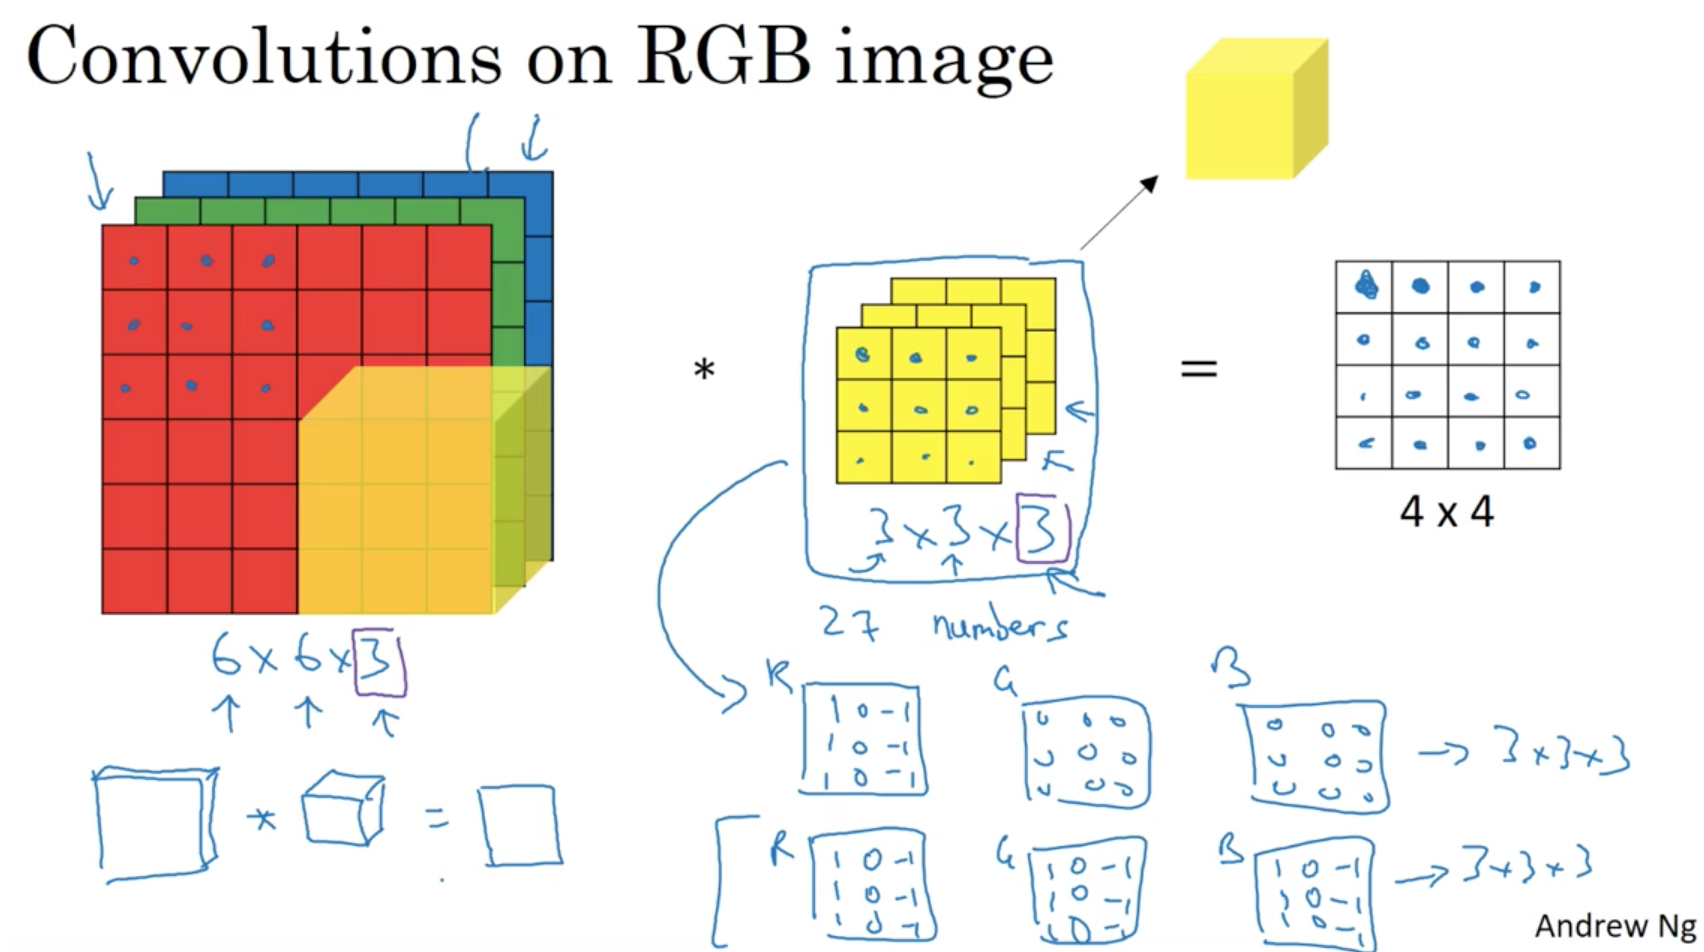

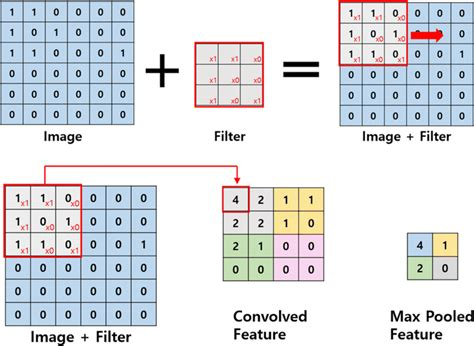

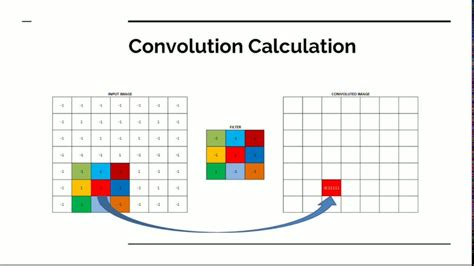

## Important Thing to Consider

During convolution, we would actually lose borders.

![ChessUrl](https://miro.medium.com/max/1408/1*bBof5ZXpokpLpoW_28zmLw.gif
"chess")

As we start going towards the edge of an image, we'll end up not having values there. For example:<br>
- For a gray scale `(n x n)` image and `(f x f)` filter/kernel, the dimensions of the image resulting from a convolution operation is <br>
> `(n – f + 1) x (n – f + 1)`.
- For example, for an `(8 x 8)` image and `(3 x 3)` filter, the output resulting after convolution operation would be of size `(6 x 6)`. Thus, the image shrinks every time a convolution operation is performed. This places an upper limit to the number of times such an operation could be performed before the image reduces to nothing thereby precluding us from building deeper networks.<br><br>
- The formula of the convolution matrix size with padding is
> `(n + 2 * p - f + 1) x (n + 2 * p - f + 1)`
- Also, the pixels on the corners and the edges are used much less than those in the middle. 
For example:

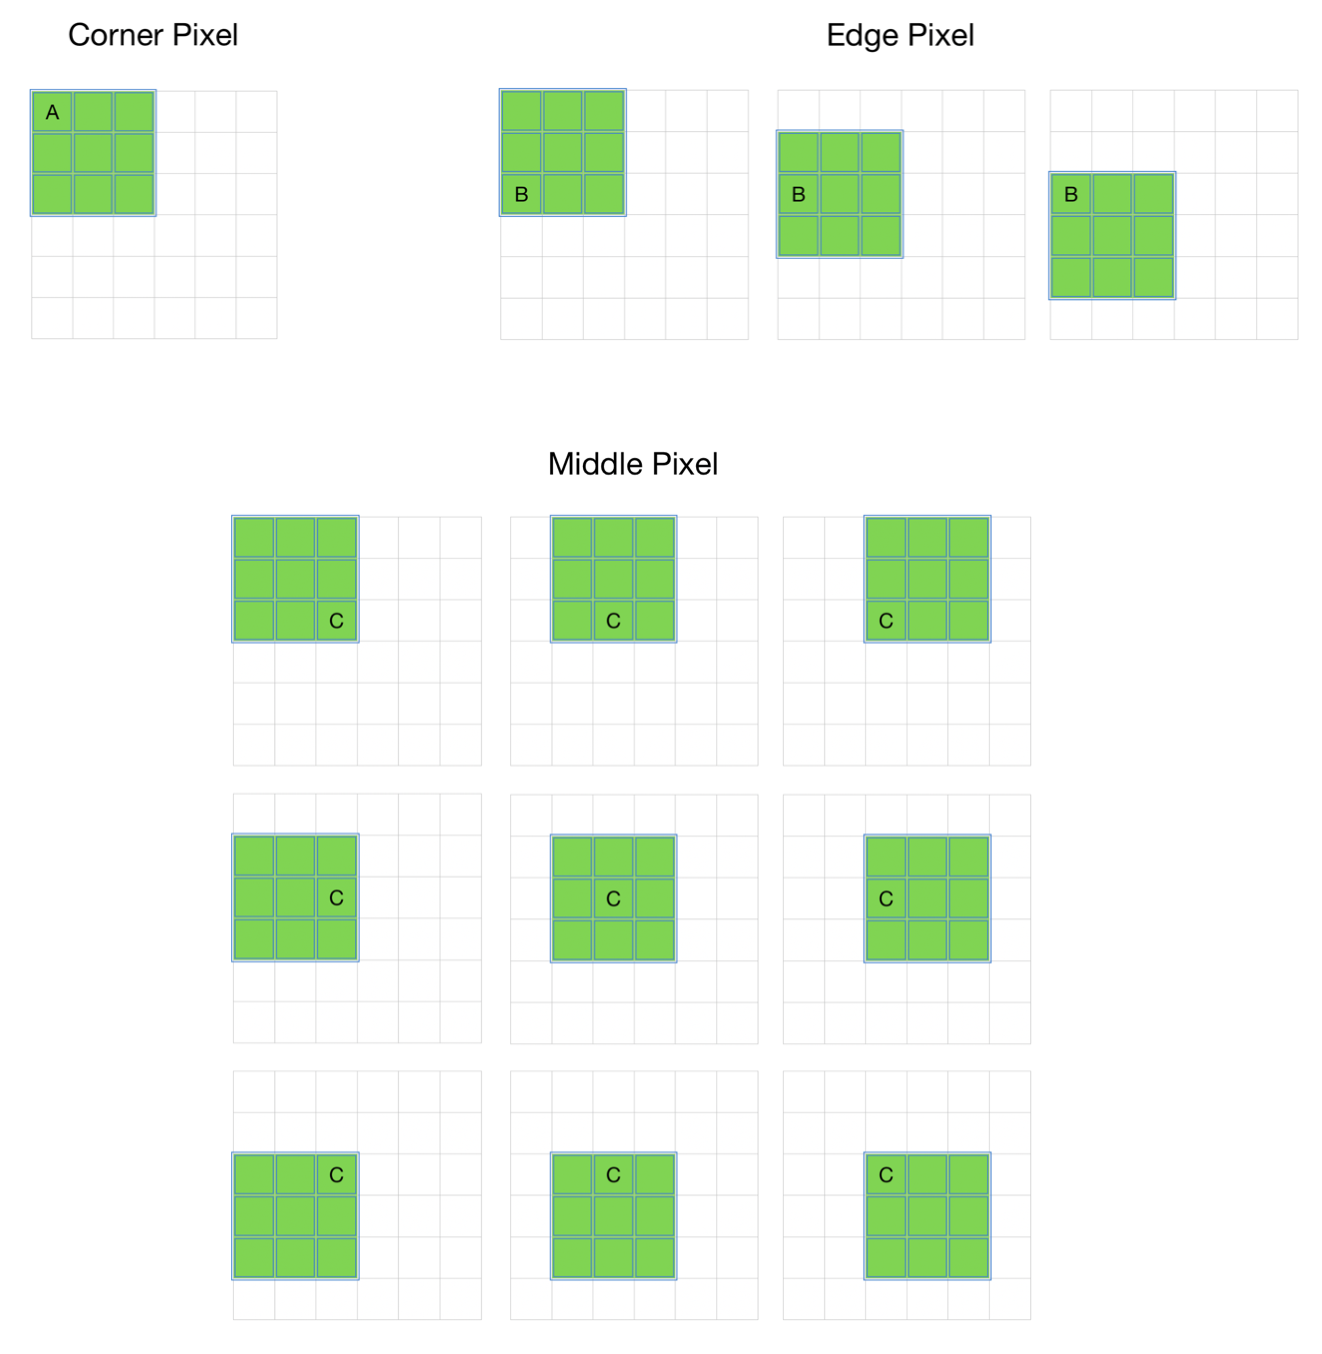

Clearly, pixel A is touched in just one convolution operation and pixel B is touched in 3 convolution operations, while pixel C is touched in 9 convolution operations. In general, pixels in the middle are used more often than pixels on corners and edges. Consequently, the information on the borders of images is not preserved as well as the information in the middle.

One way to fix this, **pad** the image with more values. Images are usually **padded** with 0.

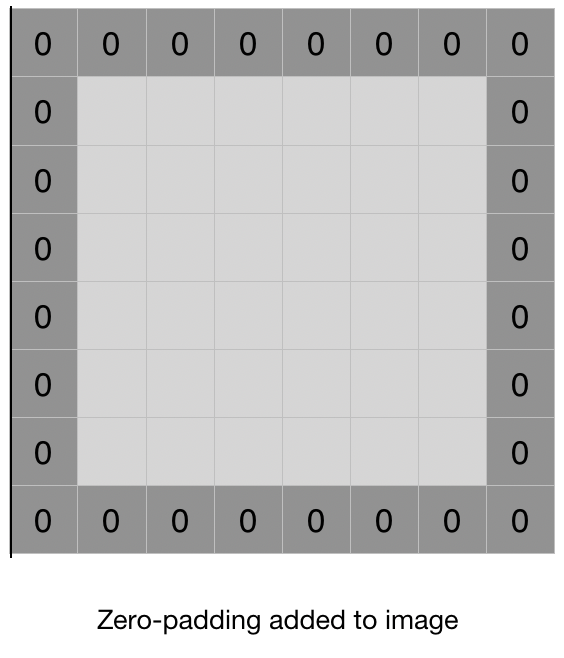

- The filter slides through the picture and the amount by which it slides is referred to as the **stride *S***. The stride is a hyperparameter. Increasing the stride reduces the size of your model by reducing the number of total patches each layer observes. However, this usually comes with a reduction in accuracy.<br><br>

- It’s common to have more than one filter. Different filters pick up different qualities of the receptive field. Apart from the stride, the spatial dimensions of the filter (height, width, number of kernels) the number of filters is another hyperparameter of a convolutional layer.<br><br>

- This means that typically we are dealing with volumes (3D tensors) and of course if someone adds the fact that we do processing in minibatches we are typically dealing with 4D tensors that contain input feature maps.

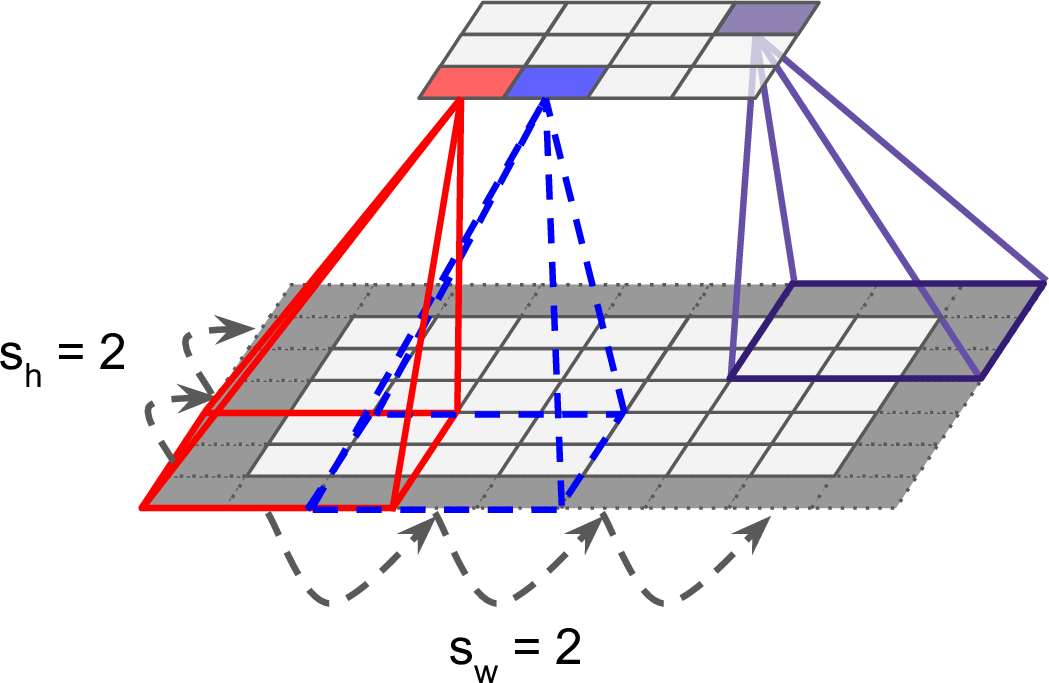

Convolutional layer with a single feature map. There's the strides `(S_h, S_w)`, the zero padding as well as the receptive field in the produced feature map.

To have the output layer same size as input size, this formula is used:<br>
> `p = (f - 1) / 2`